#Preliminary operations

##Import libraries

In [85]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [86]:
!pip install pyfim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
from fim import apriori

##Mount Google Drive

In [88]:
# mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Import datasets

In [89]:
# import dataframe (without outliers)
df = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Regression/Classification retest/Data cleaned/df_prep.xlsx", index_col="Unnamed: 0")

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   int64  
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   frame_width          2452 non-null   int64  
 9   length_ms            2452 non-null   int64  
 10  frame_count          2452 non-null   int64  
 11  intensity            2452 non-null   float64
 12  zero_crossings_sum   2452 non-null   int64  
 13  mfcc_mean            2452 non-null   float64
 14  mfcc_std             2452 non-null   float64
 15  mfcc_min             2452 non-null   f

In [91]:
# get data columns
df_data = df.loc[:, "length_ms":"skew"]

# get values from data columns
X = df_data.values

# get emotion type from each emphasis group
y_emtype = df["emotion_type"]

## Data preprocessing

In [92]:
df_new = pd.DataFrame()
df_new['emotion_type'] = df['emotion_type']

columns = ["intensity", 
           "length_ms", 
           "zero_crossings_sum",
           "mean", 
           "kur", 
           "skew"
]


for col in columns:
  df_new[col] = pd.qcut(df[col], 4)
  df_new[col] = df_new[col].astype(str) +'_'+ col

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   emotion_type        2452 non-null   object
 1   intensity           2452 non-null   object
 2   length_ms           2452 non-null   object
 3   zero_crossings_sum  2452 non-null   object
 4   mean                2452 non-null   object
 5   kur                 2452 non-null   object
 6   skew                2452 non-null   object
dtypes: object(7)
memory usage: 153.2+ KB


In [93]:
df_newval = df_new.values.tolist()

In [94]:
for col in columns:
  print(col)
  print(np.sort(pd.unique(df_new[col])))

intensity
['(-31.844, -15.578]_intensity' '(-37.303, -31.844]_intensity'
 '(-43.463, -37.303]_intensity' '(-63.866, -43.463]_intensity']
length_ms
['(2935.999, 3604.0]_length_ms' '(3604.0, 4004.0]_length_ms'
 '(4004.0, 4538.0]_length_ms' '(4538.0, 6373.0]_length_ms']
zero_crossings_sum
['(10362.5, 12383.5]_zero_crossings_sum'
 '(12383.5, 14966.0]_zero_crossings_sum'
 '(14966.0, 30153.0]_zero_crossings_sum'
 '(4720.999, 10362.5]_zero_crossings_sum']
mean
['(-0.001944, -1.39e-06]_mean' '(-1.39e-06, -9.81e-08]_mean'
 '(-9.81e-08, 8.36e-07]_mean' '(8.36e-07, 0.00122]_mean']
kur
['(1.7570000000000001, 6.52]_kur' '(14.085, 59.086]_kur'
 '(6.52, 9.829]_kur' '(9.829, 14.085]_kur']
skew
['(-0.337, 0.00426]_skew' '(-2.358, -0.337]_skew' '(0.00426, 0.263]_skew'
 '(0.263, 1.8]_skew']


# Apriori

* frequent itemset >= min_supp
* closed: an itemset is closed if none of its immediate supersets has the same support as the itemset
* maximal: an itemset is maximal frequent if none of its immediate supersets is frequent

## Support plots

### Support vs number of itemsets

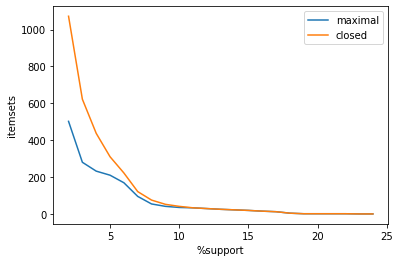

In [ ]:
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(df_newval, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(df_newval, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

### Support vs number of itemset for strong / weak

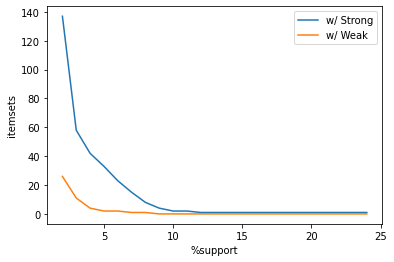

In [ ]:
filter_1 = []
filter_2 = []
for i in range(2, max_supp):
    max_itemsets = apriori(df_newval, target="r", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "strong" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "weak" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="w/ Strong")
plt.plot(np.arange(2, max_supp), filter_2, label="w/ Weak")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

## Frequent Itemset

In [ ]:
supp = 8  # 2%
zmin = 2  # minimum number of items per item set

itemsets = apriori(
    df_newval, 
    target="s", 
    supp=supp, 
    zmin=zmin, 
    report="aS"
)

frequent_df = pd.DataFrame(itemsets, columns=["frequent_itemset", "support", "support_%"])
frequent_df.sort_values(by="support_%", axis=0, ascending=False)

,frequent_itemset,support,support_%
18,"((-31.844, -15.578]_intensity, strong)",560,22.838499
64,"((0.263, 1.8]_skew, strong)",463,18.882545
68,"((14966.0, 30153.0]_zero_crossings_sum, strong)",451,18.393148
42,"((9.829, 14.085]_kur, strong)",446,18.189233
72,"((4004.0, 4538.0]_length_ms, strong)",435,17.740620
...,...,...,...
67,"((14966.0, 30153.0]_zero_crossings_sum, (4004....",201,8.197390
55,"((8.36e-07, 0.00122]_mean, (0.263, 1.8]_skew)",201,8.197390
17,"((-31.844, -15.578]_intensity, (4004.0, 4538.0...",200,8.156607
51,"((1.7570000000000001, 6.52]_kur, (-43.463, -37...",199,8.115824


## Closed Itemsets

In [ ]:
supp = 8  # 
zmin = 2  # minimum number of items per item set

itemsets = apriori(
    df_newval, 
    target="c", 
    supp=supp, 
    zmin=zmin, 
    report="aS",
)

closed_df = pd.DataFrame(itemsets, columns=["closed_itemset", "support", "support_%"])
closed_df.sort_values(by="support_%", axis=0, ascending=False)

,closed_itemset,support,support_%
18,"((-31.844, -15.578]_intensity, strong)",560,22.838499
64,"((0.263, 1.8]_skew, strong)",463,18.882545
68,"((14966.0, 30153.0]_zero_crossings_sum, strong)",451,18.393148
42,"((9.829, 14.085]_kur, strong)",446,18.189233
72,"((4004.0, 4538.0]_length_ms, strong)",435,17.740620
...,...,...,...
67,"((14966.0, 30153.0]_zero_crossings_sum, (4004....",201,8.197390
55,"((8.36e-07, 0.00122]_mean, (0.263, 1.8]_skew)",201,8.197390
17,"((-31.844, -15.578]_intensity, (4004.0, 4538.0...",200,8.156607
51,"((1.7570000000000001, 6.52]_kur, (-43.463, -37...",199,8.115824


## Maximal Itemsets

In [ ]:
supp = 8  # 
zmin = 2  # minimum number of items per item set

itemsets = apriori(
    df_newval, 
    target="m", 
    supp=supp, 
    zmin=zmin, 
    report="aS",
)

maximal_df = pd.DataFrame(itemsets, columns=["maximal_itemset", "support", "support_%"])
maximal_df.sort_values(by="support_%", axis=0, ascending=False)

,maximal_itemset,support,support_%
30,"((9.829, 14.085]_kur, strong)",446,18.189233
53,"((2935.999, 3604.0]_length_ms, strong)",433,17.659054
51,"((-37.303, -31.844]_intensity, strong)",426,17.373573
45,"((12383.5, 14966.0]_zero_crossings_sum, strong)",423,17.251223
44,"((14.085, 59.086]_kur, strong)",422,17.210440
47,"((6.52, 9.829]_kur, strong)",420,17.128874
26,"((0.00426, 0.263]_skew, strong)",417,17.006525
6,"((3604.0, 4004.0]_length_ms, strong)",401,16.353997
32,"((-0.001944, -1.39e-06]_mean, strong)",374,15.252855
28,"((-0.337, 0.00426]_skew, strong)",369,15.048940


## Rules

if the target is association rules:
                a list of rules (i.e. tuples with two or more elements),
                each consisting of a head/consequent item, a tuple with
                a body/antecedent item set, and the values selected by
                the parameter 'report', which may be combined into a
                tuple or a list if report[0] is '(' or '[', respectively.

In [ ]:
rules = apriori(
    df_newval, 
    target="r", 
    supp=2,
    zmin=1,
    conf=60,
    report="XYCl",
)

rules_ap_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "body_support",
        "head_support",
        "confidence",
        "lift",
    ],
)

In [ ]:
rules_df[rules_df["consequent"] == "strong"].sort_values(by="lift", axis=0, ascending=False)
rules_df[rules_df["consequent"] == "strong"].sort_values(by="lift", axis=0, ascending=False).to_excel("rules_df_strong.xlsx")

In [ ]:
rules_df[rules_df["consequent"] == "weak"].sort_values(by="lift", axis=0, ascending=False)
rules_df[rules_df["consequent"] == "weak"].sort_values(by="lift", axis=0, ascending=False).to_excel("rules_df_weak.xlsx")

# FP-growth

In [95]:
from fim import fpgrowth
supp = 2
zmin = 2
max_supp = 25
lift_thresh=125

## Support plots

### Support vs number of itemsets

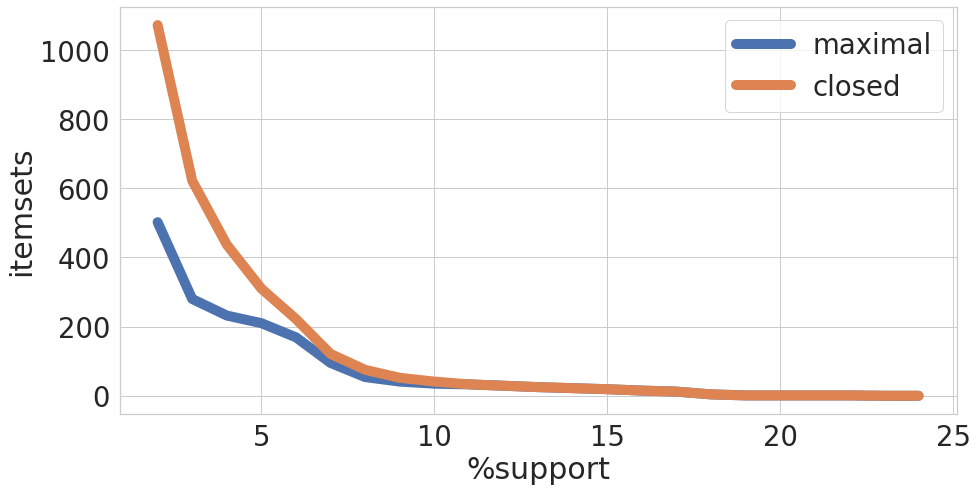

In [96]:
len_max_it = []
len_cl_it = []

for i in range(2, max_supp):
    max_itemsets = fpgrowth(df_newval, target="m", supp=i, zmin=zmin)
    cl_itemsets = fpgrowth(df_newval, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.figure(figsize=(15,7.5))
sns.set_theme(style="whitegrid", font_scale=2.5)
plt.plot(np.arange(2, max_supp), len_max_it, label="maximal", linewidth=10)
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed", linewidth=10)
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")
plt.savefig("support_vs_itemsets.svg", format="svg")
plt.show()


### Support vs number of itemset for strong / weak

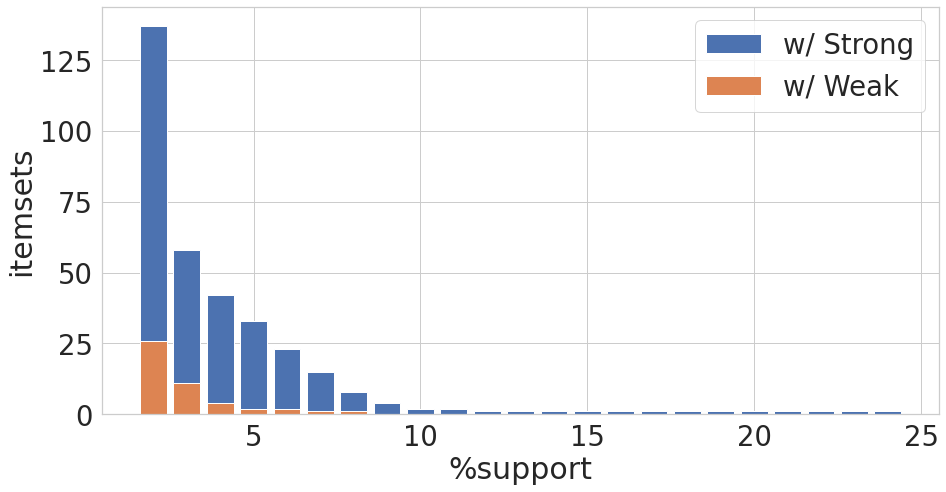

In [97]:
filter_1 = []
filter_2 = []

for i in range(2, max_supp):
    max_itemsets = fpgrowth(df_newval, target="r", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "strong" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "weak" in item[0]]))

plt.figure(figsize=(15,7.5))
sns.set_theme(style="whitegrid", font_scale=2.5)
plt.bar(range(2, max_supp, 1), filter_1, label="w/ Strong")
plt.bar(range(2, max_supp, 1), filter_2, label="w/ Weak")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")
plt.savefig("support_vs_rules.svg", format="svg")
plt.show()


* frequent itemset >= min_supp
* closed: an itemset is closed if none of its immediate supersets has the same support as the itemset
* maximal: an itemset is maximal frequent if none of its immediate supersets is frequent

## Frequent Itemset

In [98]:
itemsets = fpgrowth(
    df_newval, 
    target="s", 
    supp=3, 
    zmin=zmin, 
    report="aS",
)

strong = "strong"
weak = "weak"

frequent_df = pd.DataFrame(itemsets, columns=["frequent_itemset", "support", "support_%"])
frequent_df.sort_values(by="support_%", axis=0, ascending=False)

,frequent_itemset,support,support_%
455,"((-31.844, -15.578]_intensity, strong)",560,22.838499
287,"((0.263, 1.8]_skew, strong)",463,18.882545
378,"((14966.0, 30153.0]_zero_crossings_sum, strong)",451,18.393148
88,"((9.829, 14.085]_kur, strong)",446,18.189233
2,"((4004.0, 4538.0]_length_ms, strong)",435,17.740620
...,...,...,...
388,"((14966.0, 30153.0]_zero_crossings_sum, (0.004...",74,3.017945
146,"((-63.866, -43.463]_intensity, (-2.358, -0.337...",74,3.017945
48,"((-1.39e-06, -9.81e-08]_mean, (4004.0, 4538.0]...",74,3.017945
207,"((8.36e-07, 0.00122]_mean, (-2.358, -0.337]_sk...",74,3.017945


## Closed Itemsets

In [99]:
itemsets = fpgrowth(
    df_newval, 
    target="c", 
    supp=supp, 
    zmin=zmin, 
    report="aS",
)

closed_df = pd.DataFrame(itemsets, columns=["closed_itemset", "support", "support_%"])
closed_df.sort_values(by="support_%", axis=0, ascending=False)

,closed_itemset,support,support_%
320,"((-31.844, -15.578]_intensity, strong)",560,22.838499
642,"((0.263, 1.8]_skew, strong)",463,18.882545
472,"((14966.0, 30153.0]_zero_crossings_sum, strong)",451,18.393148
955,"((9.829, 14.085]_kur, strong)",446,18.189233
1069,"((4004.0, 4538.0]_length_ms, strong)",435,17.740620
...,...,...,...
975,"((-0.337, 0.00426]_skew, (2935.999, 3604.0]_le...",50,2.039152
694,"((14.085, 59.086]_kur, (-63.866, -43.463]_inte...",50,2.039152
424,"((14966.0, 30153.0]_zero_crossings_sum, (0.263...",50,2.039152
676,"((12383.5, 14966.0]_zero_crossings_sum, (-37.3...",50,2.039152


## Maximal Itemsets

In [100]:
itemsets = fpgrowth(
    df_newval, 
    target="m", 
    zmin=3, 
    supp = 10,
    report="aS",
)

maximal_df = pd.DataFrame(itemsets, columns=["maximal_itemset", "support", "support_%"])
maximal_df.sort_values(by="support_%", axis=0, ascending=False)

,maximal_itemset,support,support_%
0,"((4538.0, 6373.0]_length_ms, (1.75700000000000...",269,10.970636
1,"((-31.844, -15.578]_intensity, (14966.0, 30153...",264,10.766721


## Rules

if the target is association rules:
                a list of rules (i.e. tuples with two or more elements),
                each consisting of a head/consequent item, a tuple with
                a body/antecedent item set, and the values selected by
                the parameter 'report', which may be combined into a
                tuple or a list if report[0] is '(' or '[', respectively.

In [101]:
help(fpgrowth)

Help on built-in function fpgrowth in module fim:

fpgrowth(...)
    fpgrowth (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
              eval='x', agg='x', thresh=10, prune=Nobe, algo='s', mode='',
              border=None)
    Find frequent item sets with the FP-growth algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support 

In [102]:
rules = fpgrowth(
    df_newval, 
    target="r", 
    supp=11,
    zmin=2,
    conf=38,
    report="XYCl",
)

rules

rules_fp_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "body_support",
        "head_support",
        "confidence",
        "lift"
    ],
)

rules_fp_df["supp_weighted"] = rules_fp_df["body_support"]*rules_fp_df["lift"]
rules_fp_df[rules_fp_df["consequent"].isin(["strong", "weak"])].sort_values(by="supp_weighted", axis=0, ascending=False)

,consequent,antecedent,body_support,head_support,confidence,lift,supp_weighted
31,weak,"((-63.866, -43.463]_intensity,)",25.000000,38.336052,67.047308,1.748936,43.723404
60,weak,"((1.7570000000000001, 6.52]_kur,)",25.000000,38.336052,63.458401,1.655319,41.382979
16,weak,"((-2.358, -0.337]_skew,)",25.000000,38.336052,57.096248,1.489362,37.234043
88,strong,"((-31.844, -15.578]_intensity,)",24.918434,61.663948,91.653028,1.486331,37.037037
111,weak,"((4538.0, 6373.0]_length_ms,)",24.061990,38.336052,58.813559,1.534158,36.914894
7,weak,"((4720.999, 10362.5]_zero_crossings_sum,)",25.000000,38.336052,54.323002,1.417021,35.425532
23,weak,"((-1.39e-06, -9.81e-08]_mean,)",25.000000,38.336052,49.755302,1.297872,32.446809
4,weak,"((-43.463, -37.303]_intensity,)",25.040783,38.336052,47.231270,1.232033,30.851064
73,strong,"((0.263, 1.8]_skew,)",25.000000,61.663948,75.530179,1.224868,30.621693
80,strong,"((14966.0, 30153.0]_zero_crossings_sum,)",25.000000,61.663948,73.572594,1.193122,29.828042


##Classification

In [144]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
    df_new.drop("emotion_type", axis=1),
    df["emotion_type"],
    test_size=0.2, 
    random_state=0,
    stratify=df["emotion_type"]
)

In [155]:
y_pred = X_test.apply(lambda x: "weak" if x["intensity"] in ("(-63.866, -43.463]_intensity", "(1.7570000000000001, 6.52]_kur") else "strong", axis=1)

In [156]:
y_pred

928       weak
700     strong
1700    strong
2234      weak
2184    strong
         ...  
1943    strong
758       weak
1554      weak
86      strong
1673    strong
Length: 491, dtype: object

In [157]:
cm = confusion_matrix(y_test, y_pred, labels=["strong", "weak"])

In [148]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["strong", "weak"])

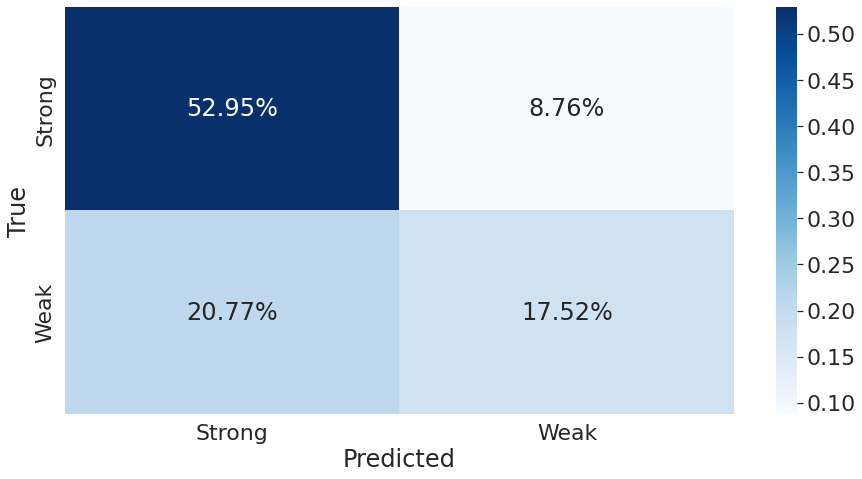

In [158]:
plt.figure(figsize=(15, 7.5))
sns.set_theme(font_scale=2)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', yticklabels=["Strong", "Weak"], xticklabels=["Strong", "Weak"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("cm_emtype.svg", format="svg")

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      strong       0.72      0.86      0.78       303
        weak       0.67      0.46      0.54       188

    accuracy                           0.70       491
   macro avg       0.69      0.66      0.66       491
weighted avg       0.70      0.70      0.69       491

